# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Portfolio/Uber/Data'

In [3]:
import os
import os.path
import pandas as pd

In [4]:
uber_2014_pickup_data = pd.read_csv(os.path.join(data_path,'uber-raw-data-2014.csv'))

In [5]:
uber_2014_pickup_data.head()

,Date/Time,Lat,Lon,Base,Date,Time
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00


# Preprocessing

In [6]:
import time
from datetime import datetime

In [7]:
# Extract date and time from the datetime feature
uber_2014_pickup_data['Date/Time'] = pd.to_datetime(uber_2014_pickup_data['Date/Time'], format='mixed')

uber_2014_pickup_data['Date'] = pd.to_datetime(uber_2014_pickup_data['Date'])

In [8]:
# Extract month, week, day of month number, day of week number, day name, and hour of day
uber_2014_pickup_data['Month'] = uber_2014_pickup_data['Date/Time'].dt.month

uber_2014_pickup_data['Week'] = uber_2014_pickup_data['Date/Time'].dt.isocalendar().week

uber_2014_pickup_data['DayOfMonthNum'] = uber_2014_pickup_data['Date/Time'].dt.day

uber_2014_pickup_data['DayOfWeekNum'] = uber_2014_pickup_data['Date/Time'].dt.dayofweek

uber_2014_pickup_data['DayOfWeek'] = uber_2014_pickup_data['Date/Time'].dt.day_name()

uber_2014_pickup_data['Hour'] = uber_2014_pickup_data['Date/Time'].dt.hour

In [9]:
uber_2014_pickup_data.head()

,Date/Time,Lat,Lon,Base,Date,Time,Month,Week,DayOfMonthNum,DayOfWeekNum,DayOfWeek,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00,4,14,1,1,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00,4,14,1,1,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00,4,14,1,1,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00,4,14,1,1,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00,4,14,1,1,Tuesday,0


# Exploratory Data Analysis (EDA)


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Compute total number of trips associated with each base
total_trips_per_base = uber_2014_pickup_data.groupby('Base')['Base'].count().reset_index(name='TripCount')
total_trips_per_base

,Base,TripCount
0,B02512,205673
1,B02598,1393113
2,B02617,1458853
3,B02682,1212789
4,B02764,263899


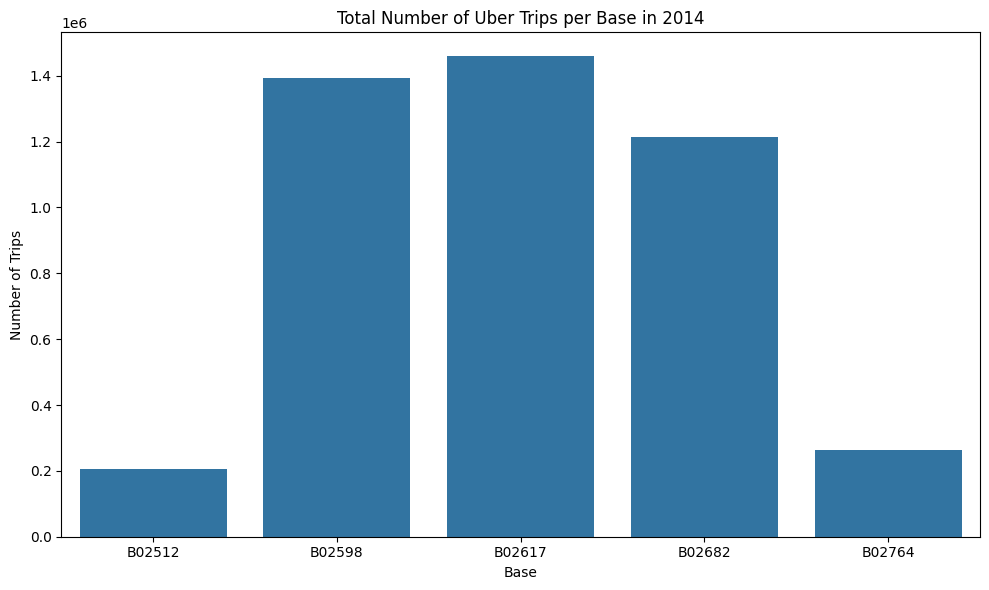

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=total_trips_per_base, x='Base', y='TripCount')
plt.title('Total Number of Uber Trips per Base in 2014')
plt.xlabel('Base')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

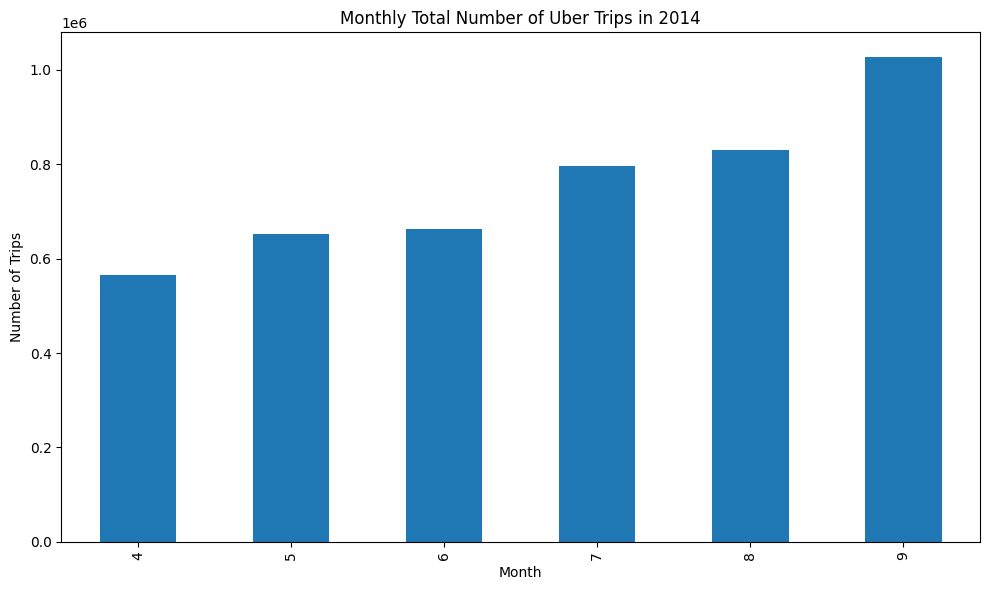

In [13]:
# Compute the number of trips for each month
plt.figure(figsize=(10,6))
uber_2014_pickup_data.groupby('Month')['Base'].count().plot(kind='bar')
plt.title('Monthly Total Number of Uber Trips in 2014')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

In [14]:
# Compute the monthly number of trips for each base
monthly_total_trips_per_base = uber_2014_pickup_data.groupby(['Month','Base'])['Base'].count().reset_index(name='TripCount')
monthly_total_trips_per_base

,Month,Base,TripCount
0,4,B02512,35536
1,4,B02598,183263
2,4,B02617,108001
3,4,B02682,227808
4,4,B02764,9908
5,5,B02512,36765
6,5,B02598,260549
7,5,B02617,122734
8,5,B02682,222883
9,5,B02764,9504


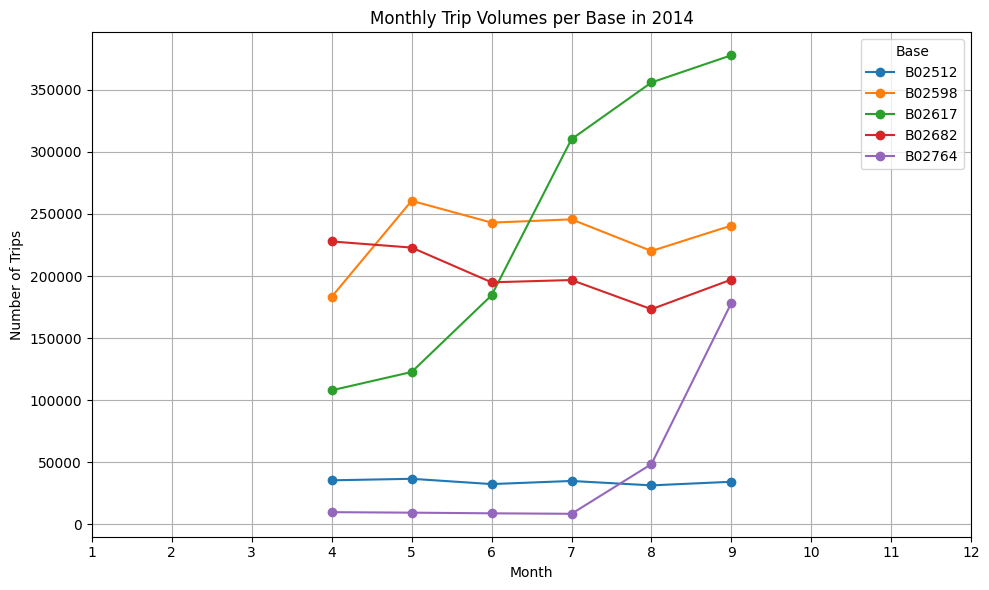

In [15]:
plt.figure(figsize=(10,6))

# Extract unique bases
bases = monthly_total_trips_per_base['Base'].unique()

# Loop over each base
for base in bases:
    base_data = monthly_total_trips_per_base[monthly_total_trips_per_base['Base'] == base] # Extract monthly trip volume for that base
    plt.plot(base_data['Month'], base_data['TripCount'], marker='o', label=base)

plt.title('Monthly Trip Volumes per Base in 2014')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.legend(title='Base')
plt.xticks(range(1,13))
plt.grid(True)
plt.tight_layout()
plt.show()

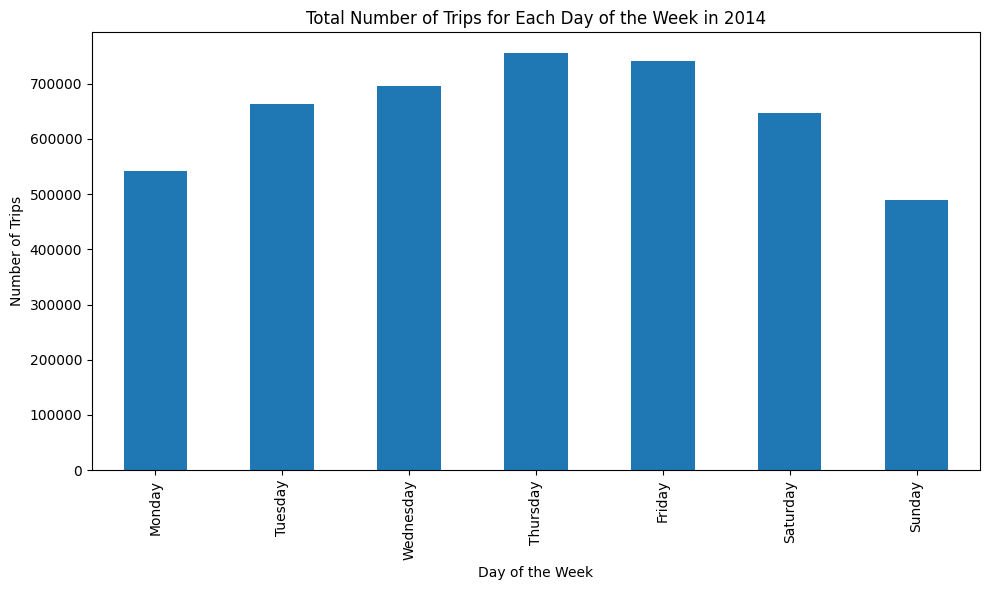

In [16]:
# Compute the number of trips for each day of the week
plt.figure(figsize=(10,6))
uber_2014_pickup_data.groupby(['DayOfWeek'])['Base'].count().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar')
plt.title('Total Number of Trips for Each Day of the Week in 2014')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

In [17]:
# Find weekdays and weekends
uber_2014_pickup_data['DayType'] = np.where(uber_2014_pickup_data['DayOfWeek'].isin(['Saturday','Sunday']),'Weekend','Weekday')
uber_2014_pickup_data

,Date/Time,Lat,Lon,Base,Date,Time,Month,Week,DayOfMonthNum,DayOfWeekNum,DayOfWeek,Hour,DayType
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00,4,14,1,1,Tuesday,0,Weekday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00,4,14,1,1,Tuesday,0,Weekday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00,4,14,1,1,Tuesday,0,Weekday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00,4,14,1,1,Tuesday,0,Weekday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00,4,14,1,1,Tuesday,0,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,2014-09-30,22:57:00,9,40,30,1,Tuesday,22,Weekday
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,2014-09-30,22:57:00,9,40,30,1,Tuesday,22,Weekday
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,2014-09-30,22:58:00,9,40,30,1,Tuesday,22,Weekday
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,2014-09-30,22:58:00,9,40,30,1,Tuesday,22,Weekday


In [18]:
# Calculate total trips during weekdays and weekends
total_trips = uber_2014_pickup_data.groupby(['DayType','Base'])['Base'].count().reset_index(name='TripCount')
total_trips

,DayType,Base,TripCount
0,Weekday,B02512,158410
1,Weekday,B02598,1047629
2,Weekday,B02617,1087847
3,Weekday,B02682,916118
4,Weekday,B02764,188029
5,Weekend,B02512,47263
6,Weekend,B02598,345484
7,Weekend,B02617,371006
8,Weekend,B02682,296671
9,Weekend,B02764,75870


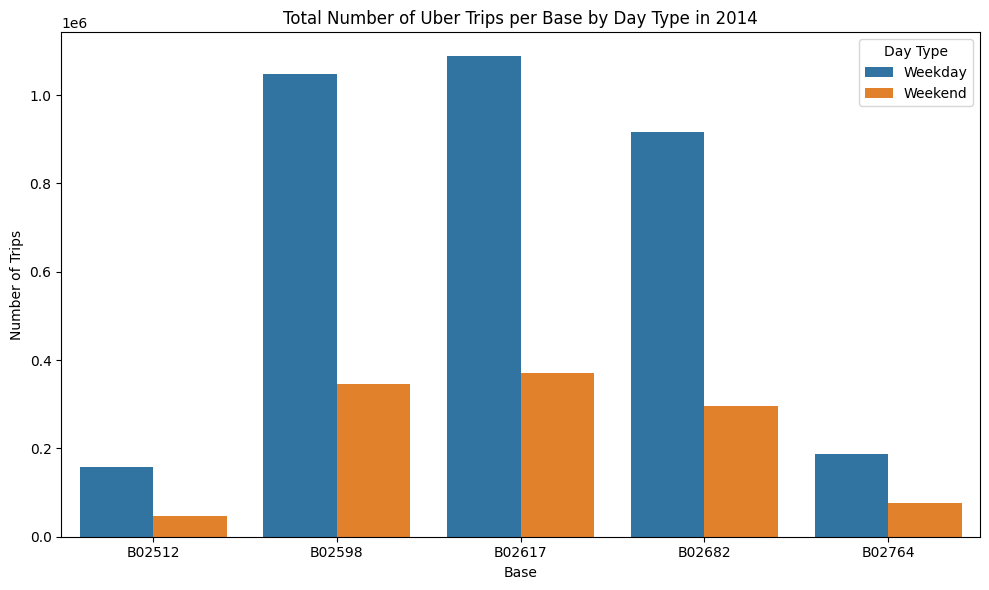

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=total_trips, x='Base', y='TripCount', hue='DayType') # hue differentiates data points on a plot by color
plt.title('Total Number of Uber Trips per Base by Day Type in 2014')
plt.xlabel('Base')
plt.ylabel('Number of Trips')
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

In [20]:
# Compute hourly trip volumes throughout each day of week for each Base
hourly_trips = uber_2014_pickup_data.groupby(['Base','DayOfWeek','Hour'])['Base'].count().reset_index(name='TripCount')
hourly_trips

,Base,DayOfWeek,Hour,TripCount
0,B02512,Friday,0,473
1,B02512,Friday,1,276
2,B02512,Friday,2,197
3,B02512,Friday,3,242
4,B02512,Friday,4,300
...,...,...,...,...
835,B02764,Wednesday,19,2427
836,B02764,Wednesday,20,2335
837,B02764,Wednesday,21,2030
838,B02764,Wednesday,22,1532


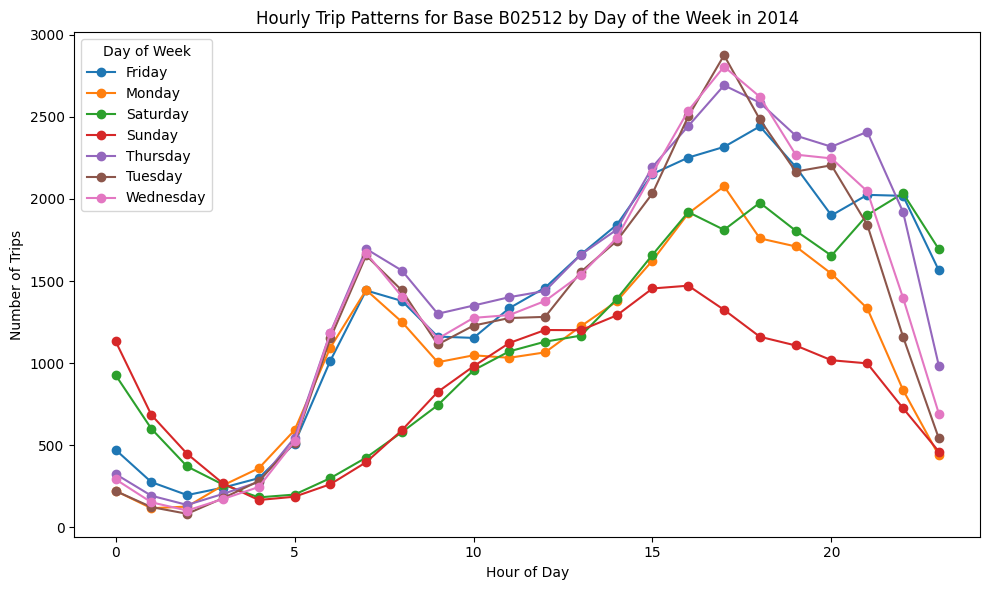

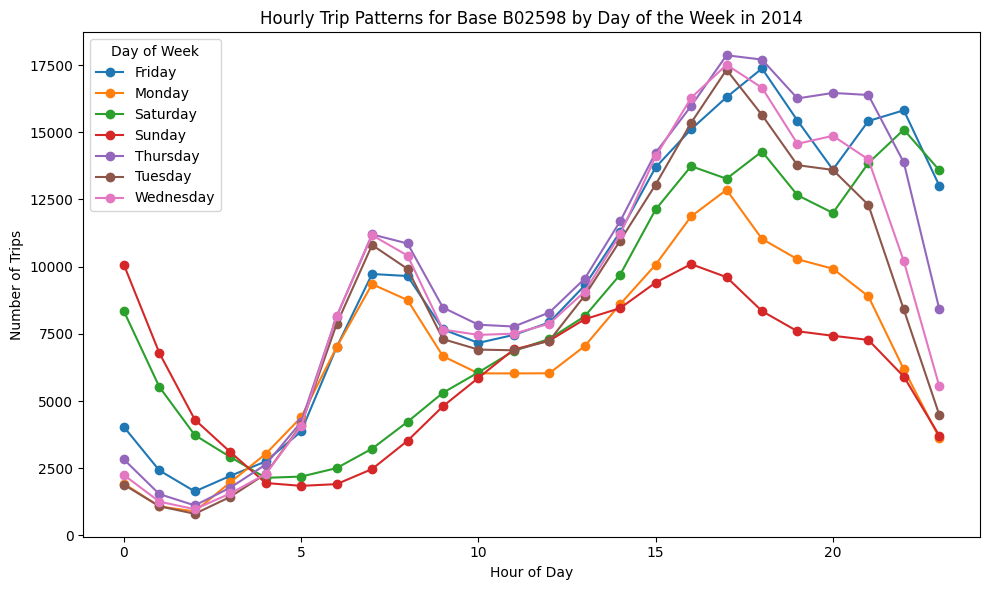

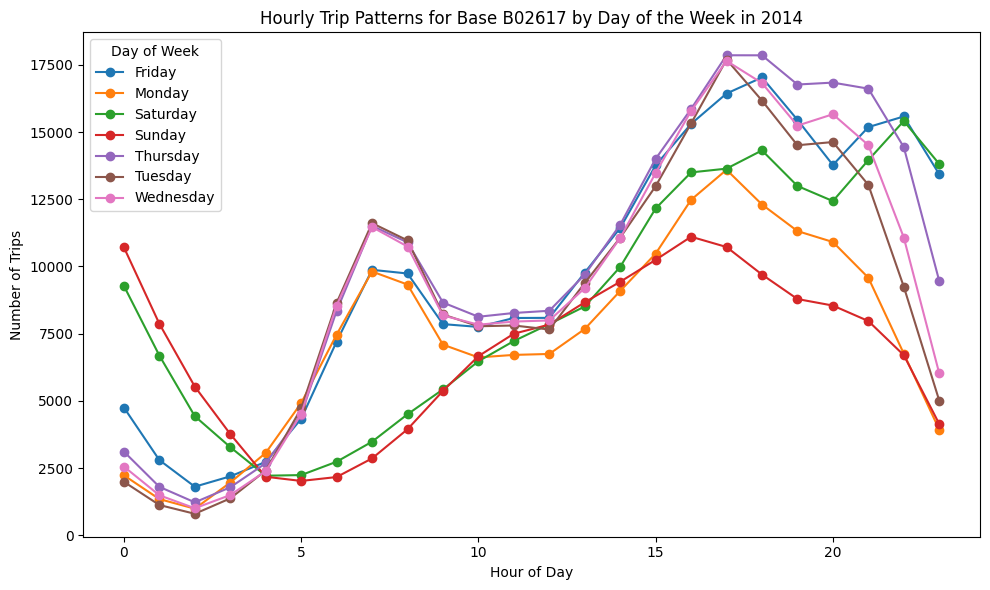

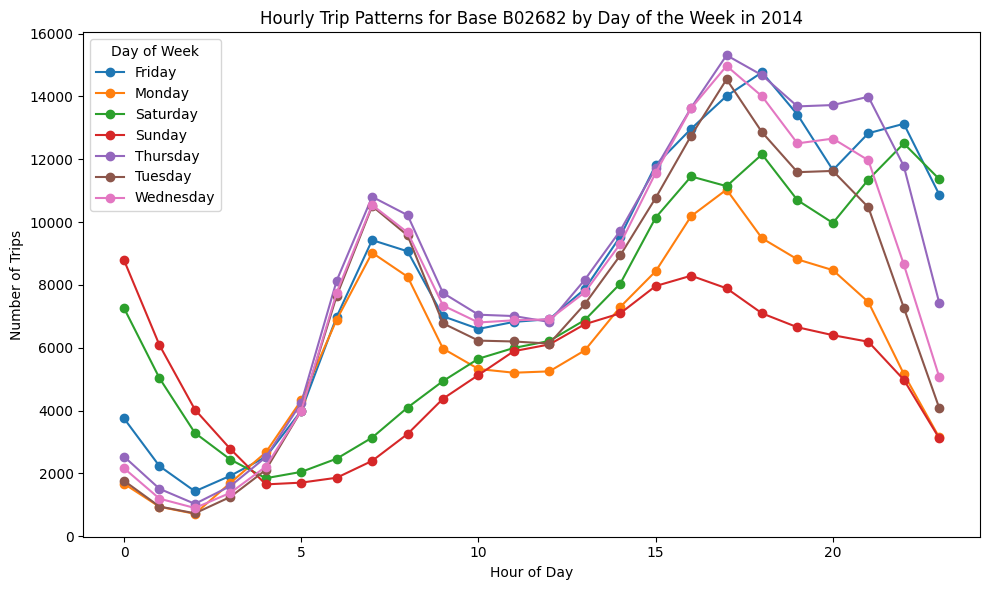

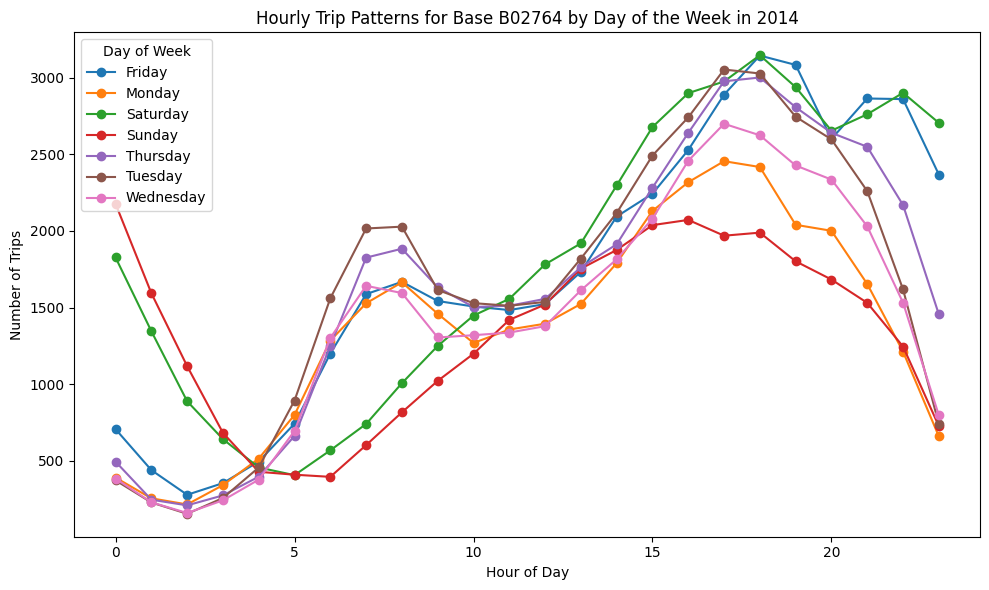

In [21]:
# Extract unique bases
bases = hourly_trips['Base'].unique()

# Loop over each base
for base in bases:
    base_data = hourly_trips[hourly_trips['Base'] == base] # Extract data for each base (7 days, 24 hours)
    plt.figure(figsize=(10,6))

    # Loop over each day of week
    for day in base_data['DayOfWeek'].unique():
        day_data = base_data[base_data['DayOfWeek'] == day] # Extract hourly data for each day of week of that base (24 hours)
        plt.plot(day_data['Hour'], day_data['TripCount'], marker='o', label=day)

    plt.title(f'Hourly Trip Patterns for Base {base} by Day of the Week in 2014')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Trips')
    plt.legend(title='Day of Week', loc='upper left')
    plt.tight_layout()
    plt.show()

In [22]:
# Compute the number of rides across dates
daily_trips = uber_2014_pickup_data.groupby('Date')['Base'].count().reset_index(name='TripCount')
daily_trips

,Date,TripCount
0,2014-04-01,14546
1,2014-04-02,17474
2,2014-04-03,20701
3,2014-04-04,26714
4,2014-04-05,19521
...,...,...
178,2014-09-26,37504
179,2014-09-27,39468
180,2014-09-28,29656
181,2014-09-29,29201


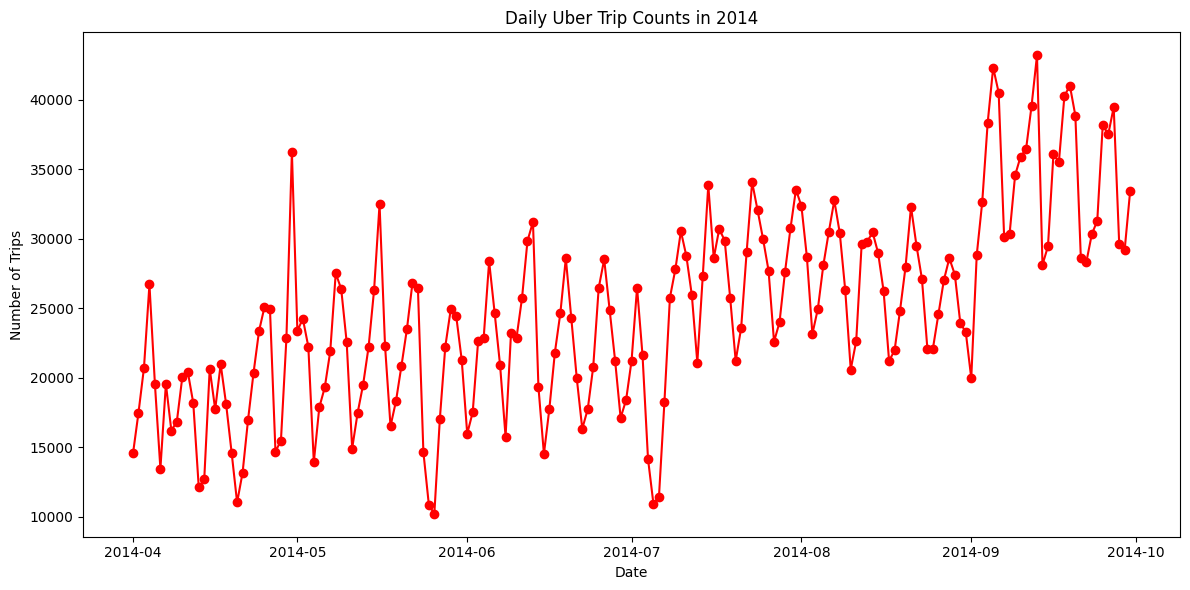

In [23]:
plt.figure(figsize=(12,6))
plt.plot(daily_trips['Date'], daily_trips['TripCount'], marker='o', linestyle='-', color='red')
plt.title('Daily Uber Trip Counts in 2014')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

In [24]:
# Compute total hourly trips over days
hourly_trip_counts = uber_2014_pickup_data.groupby(['Date','Hour'])['Base'].count().reset_index(name='TripCount')
hourly_trip_counts

,Date,Hour,TripCount
0,2014-04-01,0,138
1,2014-04-01,1,66
2,2014-04-01,2,53
3,2014-04-01,3,93
4,2014-04-01,4,166
...,...,...,...
4386,2014-09-30,18,2625
4387,2014-09-30,19,2404
4388,2014-09-30,20,2246
4389,2014-09-30,21,1961


In [25]:
# Compute average hourly trips across all days
avg_hourly_trip_counts = hourly_trip_counts.groupby('Hour')['TripCount'].mean().reset_index()
avg_hourly_trip_counts

,Hour,TripCount
0,0,567.409836
1,1,367.360656
2,2,250.628415
3,3,263.863388
4,4,301.803279
5,5,458.683060
6,6,782.584699
7,7,1055.158470
8,8,1041.005464
9,9,874.136612


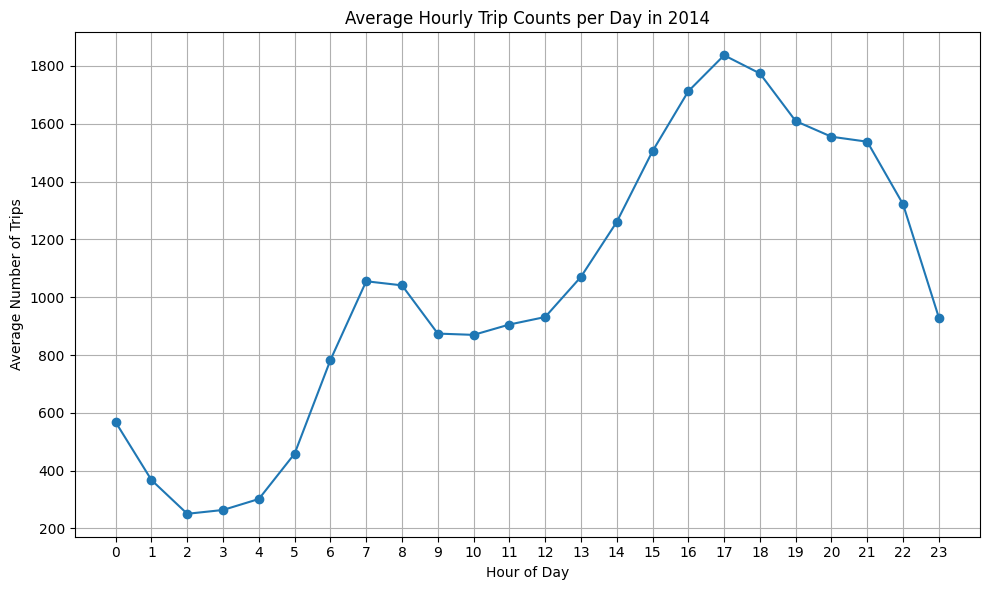

In [26]:
plt.figure(figsize=(10,6))
plt.plot(avg_hourly_trip_counts['Hour'], avg_hourly_trip_counts['TripCount'], marker='o')
plt.title('Average Hourly Trip Counts per Day in 2014')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Trips')
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# Unstack hourly trip counts across all days
hourly_trips = hourly_trip_counts.set_index(['Date','Hour']).unstack(level='Hour')

# Rename the column headers
hourly_trips.columns = [f'Hour_{int(hour)}' for hour in hourly_trips.columns.get_level_values(1)]

hourly_trips

,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,138.0,66.0,53.0,93.0,166.0,333.0,722.0,1001.0,780.0,532.0,...,736.0,967.0,1152.0,1262.0,1122.0,1018.0,597.0,878.0,529.0,317.0
2014-04-02,161.0,82.0,59.0,80.0,196.0,344.0,785.0,1099.0,927.0,656.0,...,868.0,1138.0,1313.0,1600.0,1252.0,1086.0,1143.0,994.0,638.0,348.0
2014-04-03,194.0,106.0,66.0,130.0,193.0,354.0,750.0,1022.0,864.0,591.0,...,934.0,1247.0,1438.0,1640.0,1628.0,1374.0,1591.0,1714.0,1580.0,793.0
2014-04-04,329.0,184.0,117.0,154.0,238.0,381.0,839.0,1202.0,1065.0,769.0,...,1190.0,1504.0,1865.0,2280.0,2449.0,2133.0,1489.0,1929.0,1859.0,1339.0
2014-04-05,723.0,416.0,215.0,181.0,153.0,177.0,206.0,279.0,340.0,450.0,...,704.0,1078.0,1313.0,1445.0,1575.0,1440.0,1348.0,1572.0,1830.0,1700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-26,606.0,346.0,239.0,340.0,406.0,684.0,1163.0,1525.0,1340.0,1232.0,...,1738.0,2038.0,2299.0,2626.0,3039.0,2782.0,2440.0,2686.0,2547.0,2355.0
2014-09-27,1686.0,1232.0,751.0,527.0,361.0,422.0,530.0,679.0,871.0,1091.0,...,1889.0,2230.0,2438.0,2562.0,2787.0,2683.0,2366.0,2863.0,2909.0,2710.0
2014-09-28,2087.0,1410.0,982.0,659.0,416.0,477.0,445.0,589.0,803.0,990.0,...,1760.0,1828.0,1937.0,1811.0,1800.0,1568.0,1415.0,1253.0,1009.0,621.0


In [28]:
# Calculate the correlation matrix of hourly trip counts
correlation_matrix = hourly_trips.corr()
correlation_matrix

,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
Hour_0,1.000000,0.982034,0.960174,0.854002,0.045657,-0.374629,-0.585018,-0.598574,-0.451306,-0.111398,...,0.182788,0.083377,-0.038235,-0.168466,-0.067043,-0.036354,-0.094682,-0.007936,0.193837,0.320494
Hour_1,0.982034,1.000000,0.985735,0.871232,0.041623,-0.381712,-0.588997,-0.603788,-0.463290,-0.128047,...,0.159375,0.059920,-0.057214,-0.177636,-0.082865,-0.053276,-0.109758,-0.025751,0.168862,0.293875
Hour_2,0.960174,0.985735,1.000000,0.905902,0.067254,-0.363924,-0.579392,-0.596502,-0.453396,-0.113413,...,0.161722,0.059772,-0.057460,-0.176448,-0.087796,-0.058450,-0.105644,-0.030556,0.159515,0.277501
Hour_3,0.854002,0.871232,0.905902,1.000000,0.417988,-0.038216,-0.326886,-0.348597,-0.186310,0.150130,...,0.341576,0.228101,0.105269,-0.012633,0.072759,0.117409,0.076310,0.117566,0.272854,0.358113
Hour_4,0.045657,0.041623,0.067254,0.417988,1.000000,0.827730,0.607839,0.590060,0.685292,0.767504,...,0.647511,0.600891,0.574163,0.558289,0.554507,0.595222,0.590594,0.502512,0.402200,0.311501
Hour_5,-0.374629,-0.381712,-0.363924,-0.038216,0.827730,1.000000,0.909400,0.887328,0.913276,0.847306,...,0.609757,0.621218,0.648618,0.686749,0.612890,0.627898,0.664203,0.533184,0.310706,0.132044
Hour_6,-0.585018,-0.588997,-0.579392,-0.326886,0.607839,0.909400,1.000000,0.985651,0.957893,0.802860,...,0.547487,0.598967,0.665719,0.740034,0.630162,0.613012,0.661383,0.535270,0.261587,0.045090
Hour_7,-0.598574,-0.603788,-0.596502,-0.348597,0.590060,0.887328,0.985651,1.000000,0.967263,0.807547,...,0.546508,0.597345,0.667476,0.746672,0.639998,0.616592,0.663259,0.540810,0.262834,0.046276
Hour_8,-0.451306,-0.463290,-0.453396,-0.186310,0.685292,0.913276,0.957893,0.967263,1.000000,0.910962,...,0.652839,0.687271,0.737886,0.795199,0.705136,0.684995,0.724782,0.605303,0.353460,0.144769
Hour_9,-0.111398,-0.128047,-0.113413,0.150130,0.767504,0.847306,0.802860,0.807547,0.910962,1.000000,...,0.787899,0.783826,0.787815,0.791672,0.742544,0.740610,0.761811,0.672421,0.487572,0.308083


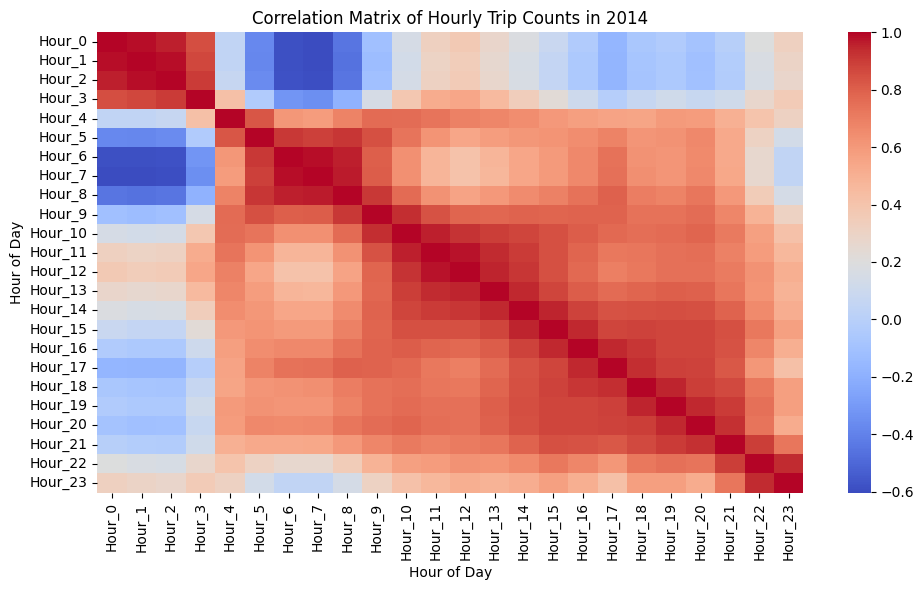

In [29]:
# Visualize the correlation matrix of hourly trip counts
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Hourly Trip Counts in 2014')
plt.xlabel('Hour of Day')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

# Linear Regression

In [30]:
# Examine the relationship between daily trips and the day of the week and the month
daily_trips['DayOfWeek'] = daily_trips['Date'].dt.day_name()

daily_trips['Month'] = daily_trips['Date'].dt.month

daily_trips

,Date,TripCount,DayOfWeek,Month
0,2014-04-01,14546,Tuesday,4
1,2014-04-02,17474,Wednesday,4
2,2014-04-03,20701,Thursday,4
3,2014-04-04,26714,Friday,4
4,2014-04-05,19521,Saturday,4
...,...,...,...,...
178,2014-09-26,37504,Friday,9
179,2014-09-27,39468,Saturday,9
180,2014-09-28,29656,Sunday,9
181,2014-09-29,29201,Monday,9


In [31]:
# Convert categorical variables into dummy variables
day_dummies = pd.get_dummies(daily_trips['DayOfWeek'], drop_first=True)
month_dummies = pd.get_dummies(daily_trips['Month'], prefix='Month', drop_first=True)

# Concat dummies to the dataset
daily_trips = pd.concat([daily_trips, day_dummies, month_dummies], axis=1)
daily_trips

,Date,TripCount,DayOfWeek,Month,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Month_5,Month_6,Month_7,Month_8,Month_9
0,2014-04-01,14546,Tuesday,4,False,False,False,False,True,False,False,False,False,False,False
1,2014-04-02,17474,Wednesday,4,False,False,False,False,False,True,False,False,False,False,False
2,2014-04-03,20701,Thursday,4,False,False,False,True,False,False,False,False,False,False,False
3,2014-04-04,26714,Friday,4,False,False,False,False,False,False,False,False,False,False,False
4,2014-04-05,19521,Saturday,4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2014-09-26,37504,Friday,9,False,False,False,False,False,False,False,False,False,False,True
179,2014-09-27,39468,Saturday,9,False,True,False,False,False,False,False,False,False,False,True
180,2014-09-28,29656,Sunday,9,False,False,True,False,False,False,False,False,False,False,True
181,2014-09-29,29201,Monday,9,True,False,False,False,False,False,False,False,False,False,True


In [32]:
# Combine day and month columns into a single list
dummy_cols = day_dummies.columns.tolist() + month_dummies.columns.tolist()

# Convert boolean variables into binary variables
daily_trips[dummy_cols] = daily_trips[dummy_cols].astype(int)

daily_trips

,Date,TripCount,DayOfWeek,Month,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Month_5,Month_6,Month_7,Month_8,Month_9
0,2014-04-01,14546,Tuesday,4,0,0,0,0,1,0,0,0,0,0,0
1,2014-04-02,17474,Wednesday,4,0,0,0,0,0,1,0,0,0,0,0
2,2014-04-03,20701,Thursday,4,0,0,0,1,0,0,0,0,0,0,0
3,2014-04-04,26714,Friday,4,0,0,0,0,0,0,0,0,0,0,0
4,2014-04-05,19521,Saturday,4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2014-09-26,37504,Friday,9,0,0,0,0,0,0,0,0,0,0,1
179,2014-09-27,39468,Saturday,9,0,1,0,0,0,0,0,0,0,0,1
180,2014-09-28,29656,Sunday,9,0,0,1,0,0,0,0,0,0,0,1
181,2014-09-29,29201,Monday,9,1,0,0,0,0,0,0,0,0,0,1


In [33]:
import statsmodels.api as sm

# Define variables
y = daily_trips['TripCount']
X = daily_trips[dummy_cols]

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y,X).fit()

# Show summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              TripCount   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     50.53
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           6.11e-48
Time:                        05:34:55   Log-Likelihood:                -1748.5
No. Observations:                 183   AIC:                             3521.
Df Residuals:                     171   BIC:                             3560.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.255e+04    915.019     24.645      0.000    2.07e+04    2.44e+04
Monday     -8037.1450    980.862     -8.194      0.000   -9973.302   -6100.988
Saturday   -3654.8077    979.622     -3.731      0.000   -5588.517   -1721.099
Sunday     -9717.2324    980.241     -9.913      0.000   -1.17e+04   -7782.301
Thursday     590.0221    980.232      0.602      0.548   -1344.890    2524.935
Tuesday    -4156.0232    971.956     -4.276      0.000   -6074.600   -2237.446
Wednesday  -1588.2384    980.853     -1.619      0.107   -3524.378     347.901
Month_5     2022.2277    905.968      2.232      0.027     233.907    3810.549
Month_6     3711.2705    913.141      4.064      0.000    1908.791    5513.750
Month_7     6724.6617    904.836      7.432      0.000    4938.575    8510.748
Month_8     8059.2359    905.970      8.896      0.000    6270.912    9847.560
Month_9     1.567e+04    912.564     17.170      0.000    1.39e+04    1.75e+04
==============================================================================
Omnibus:                       34.735   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.508
Skew:                          -0.413   Prob(JB):                     1.08e-49
Kurtosis:                       8.375   Cond. No.                         8.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression results align well with insights from the exploratory data analysis.

- The bar charts showed that **trip volumes were highest on weekdays, especially Thursday and Friday**, while **weekends had noticeably fewer trips**—a trend confirmed by the regression model, where coefficients for Saturday and Sunday were significantly negative and statistically significant (p < 0.001). Monday and Tuesday also had lower trip counts compared to the baseline (likely Thursday), which the model reflects through their negative coefficients.

- In terms of monthly variation, the EDA revealed **a steady increase in trips from April to September, peaking in September**—consistent with the regression results showing strong positive and statistically significant coefficients for summer months, especially July, August, and September.

Overall, both the regression and EDA complement each other: EDA highlights patterns visually, while regression quantifies them, allowing for clearer statistical interpretation and validation of observed trends.

# Clustering

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [35]:
# Extract coordinates (latitude and longitude)
coords = uber_2014_pickup_data[['Lat','Lon']]
coords.head()

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722


In [36]:
# Normalize coordinates (latitude and longitude)
scaler = StandardScaler()
norm_coords = scaler.fit_transform(coords)

# Store the normalized coordinates in a DataFrame
norm_coords = pd.DataFrame(norm_coords, columns = ['Lat_norm', 'Lon_norm'])

norm_coords.head()

,Lat_norm,Lon_norm
0,0.744413,0.316403
1,-0.314413,-1.073585
2,-0.191759,-0.249371
3,0.489094,-0.079988
4,0.504112,0.014308


In [37]:
# Observe the clustering results for different K values
K_values = [2,3,5,7,9,12,16]

cluster_centers_dict = {}

# Loop over each K value
for K in K_values:

  # Initialize the KMeans model with K clusters
  K_means = KMeans(n_clusters=K, random_state=42)

  # Perform K-Means clustering on the normalized data
  K_means.fit(norm_coords)

  # Store the cluster centroids in a DataFrame
  stored_cluster_centers = pd.DataFrame(K_means.cluster_centers_, columns=['Lat_norm', 'Lon_norm'])

  # Transform the centroids back to their original scale
  cluster_centers_original = scaler.inverse_transform(stored_cluster_centers)
  cluster_centers_original = pd.DataFrame(cluster_centers_original, columns=['Latitude', 'Longitude'])

  # Save the original-scale cluster centroids in the dictionary
  cluster_centers_dict[K] = cluster_centers_original

  # Assign cluster labels to the data for K clusters
  uber_2014_pickup_data[f'Cluster_{K}'] = K_means.labels_

In [38]:
# Visualize the cluster centroids on Folium maps
import folium

# Set map center to the average coordinates
map_center = [coords['Lat'].mean(), coords['Lon'].mean()]

# Loop over each K value
for K in K_values:
    map_ = folium.Map(location=map_center, zoom_start=11)

    # Extract cluster centroids for that K value
    cluster_centers = cluster_centers_dict[K]

    # Add each centroid as a marker on the map
    for idx, row in cluster_centers.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f'Cluster {idx}',
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(map_)

    print(f"\nMap of Cluster Centers for K = {K}")
    display(map_)


Map of Cluster Centers for K = 2



Map of Cluster Centers for K = 3



Map of Cluster Centers for K = 5



Map of Cluster Centers for K = 7



Map of Cluster Centers for K = 9



Map of Cluster Centers for K = 12



Map of Cluster Centers for K = 16


In [39]:
# Use the elbow method to find the optimal K
inertia = []

# Compute inertia for each K
for K in K_values:
    K_means = KMeans(n_clusters=K, random_state=42)
    K_means.fit(norm_coords)
    inertia.append(K_means.inertia_)

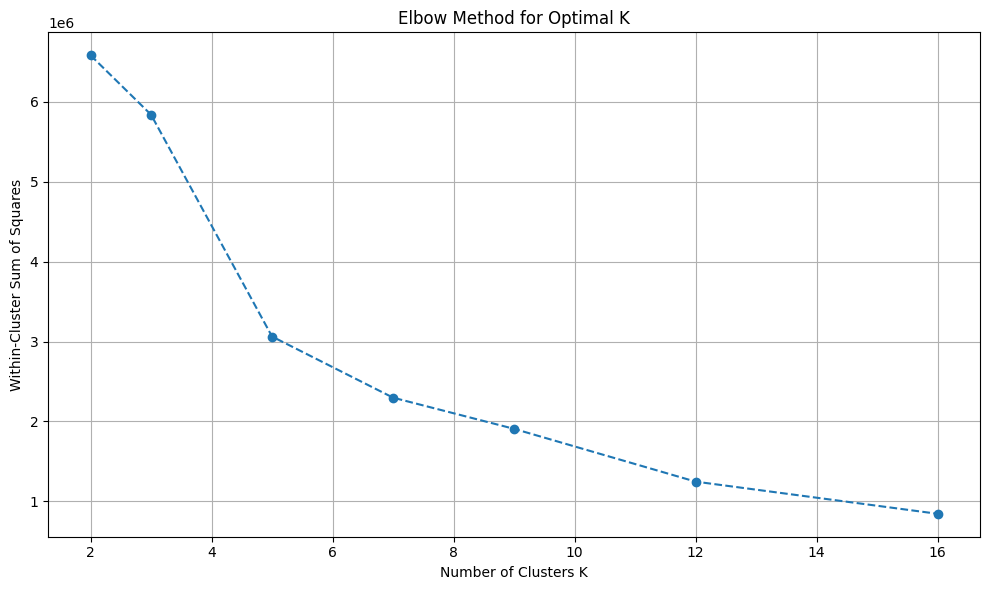

In [40]:
plt.figure(figsize=(10,6))
plt.plot(K_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters K')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.tight_layout()
plt.show()

There's a noticeable "elbow" around **K = 5 (optimal)**. That's the point where the inertia drops sharply up to K = 5, and then the curve starts to flatten, indicating diminishing returns from adding more clusters.

In [41]:
# Run the K-Means clustering with optimal number of clusters for each month

# Extract unique months
months = sorted(uber_2014_pickup_data['Month'].unique())

centroids_per_month = {}

# Loop over each month
for month in months:

  # Extract data for that month
  monthly_data = uber_2014_pickup_data[uber_2014_pickup_data['Month'] == month]

  # Extract and normalize coordinates for that month
  coords = monthly_data[['Lat', 'Lon']]
  scaler = StandardScaler()
  norm_coords = scaler.fit_transform(coords)

  # Apply K-Means clustering
  k_means = KMeans(n_clusters=5, random_state=42)
  k_means.fit(norm_coords)

  normalized_cluster_centers = k_means.cluster_centers_

  # Transform the centroids back to their original scale
  cluster_centers = scaler.inverse_transform(normalized_cluster_centers)

  # Store the cluster centroids in a DataFrame
  cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Latitude', 'Longitude'])
  cluster_centers_df['Month'] = month
  centroids_per_month[month] = cluster_centers_df

  # Assign cluster labels to the original data
  monthly_data[f'Cluster_Month_{month}'] = k_means.labels_
  uber_2014_pickup_data.loc[monthly_data.index, f'Cluster_Month_{month}'] = k_means.labels_

# Combine all monthly centroids into a single DataFrame
centroids_per_month_df = pd.concat(centroids_per_month.values(), ignore_index=True)

<ipython-input-41-10428058a889>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data[f'Cluster_Month_{month}'] = k_means.labels_
<ipython-input-41-10428058a889>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data[f'Cluster_Month_{month}'] = k_means.labels_
<ipython-input-41-10428058a889>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [42]:
centroids_per_month_df

,Latitude,Longitude,Month
0,40.730803,-74.000035,4
1,40.768144,-73.965802,4
2,40.662450,-73.779542,4
3,40.683772,-73.968203,4
4,40.986885,-73.726795,4
5,40.681820,-73.966685,5
6,40.771439,-73.961708,5
7,40.665229,-73.772141,5
8,40.694616,-74.203812,5
9,40.732817,-73.994927,5


In [43]:
uber_2014_pickup_data.head()

,Date/Time,Lat,Lon,Base,Date,Time,Month,Week,DayOfMonthNum,DayOfWeekNum,...,Cluster_7,Cluster_9,Cluster_12,Cluster_16,Cluster_Month_4,Cluster_Month_5,Cluster_Month_6,Cluster_Month_7,Cluster_Month_8,Cluster_Month_9
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00,4,14,1,1,...,1,1,9,9,1.0,NaN,NaN,NaN,NaN,NaN
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00,4,14,1,1,...,3,3,3,12,0.0,NaN,NaN,NaN,NaN,NaN
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00,4,14,1,1,...,3,3,3,3,0.0,NaN,NaN,NaN,NaN,NaN
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00,4,14,1,1,...,1,1,1,1,1.0,NaN,NaN,NaN,NaN,NaN
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00,4,14,1,1,...,1,1,1,1,1.0,NaN,NaN,NaN,NaN,NaN


In [44]:
# Set map center to the average coordinates
map_center = [uber_2014_pickup_data['Lat'].mean(), uber_2014_pickup_data['Lon'].mean()]

# Loop over each month
for month in months:
    map_ = folium.Map(location=map_center, zoom_start=11)

    # Extract cluster centroids for that month
    cluster_centers_df = centroids_per_month[month]

    # Add each centroid as a marker on the map
    for idx, row in cluster_centers_df.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f'Month: {month}, Cluster: {idx}',
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(map_)

    print(f"\nMap of Cluster Centers for Month {month}")
    display(map_)


Map of Cluster Centers for Month 4



Map of Cluster Centers for Month 5



Map of Cluster Centers for Month 6



Map of Cluster Centers for Month 7



Map of Cluster Centers for Month 8



Map of Cluster Centers for Month 9


In [45]:
cluster_percentages = pd.DataFrame()

In [46]:
# Loop over each month
for month in months:

  # Extract data for that month
  monthly_data = uber_2014_pickup_data[uber_2014_pickup_data['Month'] == month]

  cluster_col = f'Cluster_Month_{month}'

  total_rides_per_each_month = len(monthly_data)

  # Count rides per cluster
  cluster_counts = monthly_data[cluster_col].value_counts().sort_index()

  # Compute percentage of rides per cluster
  cluster_percentage = (cluster_counts/total_rides_per_each_month) * 100

  cluster_percentage.name = month

  cluster_percentages = pd.concat([cluster_percentages, cluster_percentage], axis=1)

cluster_percentages.index.name = 'Month'
cluster_percentages.sort_index(inplace=True)

<ipython-input-46-4ddbdaea2ace>:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  cluster_percentages = pd.concat([cluster_percentages, cluster_percentage], axis=1)


In [47]:
# Format cluster percentage values
cluster_percentages_pct = cluster_percentages.applymap(lambda x: f"{x:.2f}%")
cluster_percentages_pct

<ipython-input-47-6f95ec96175f>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cluster_percentages_pct = cluster_percentages.applymap(lambda x: f"{x:.2f}%")


,4,5,6,7,8,9
Month,,,,,,
0.0,47.78%,9.31%,54.13%,9.33%,60.76%,17.15%
1.0,39.83%,37.29%,35.99%,40.27%,18.02%,16.01%
2.0,2.69%,3.10%,3.31%,5.49%,3.74%,3.50%
3.0,9.47%,0.97%,5.45%,3.40%,0.52%,0.99%
4.0,0.23%,49.32%,1.11%,41.51%,16.97%,62.34%


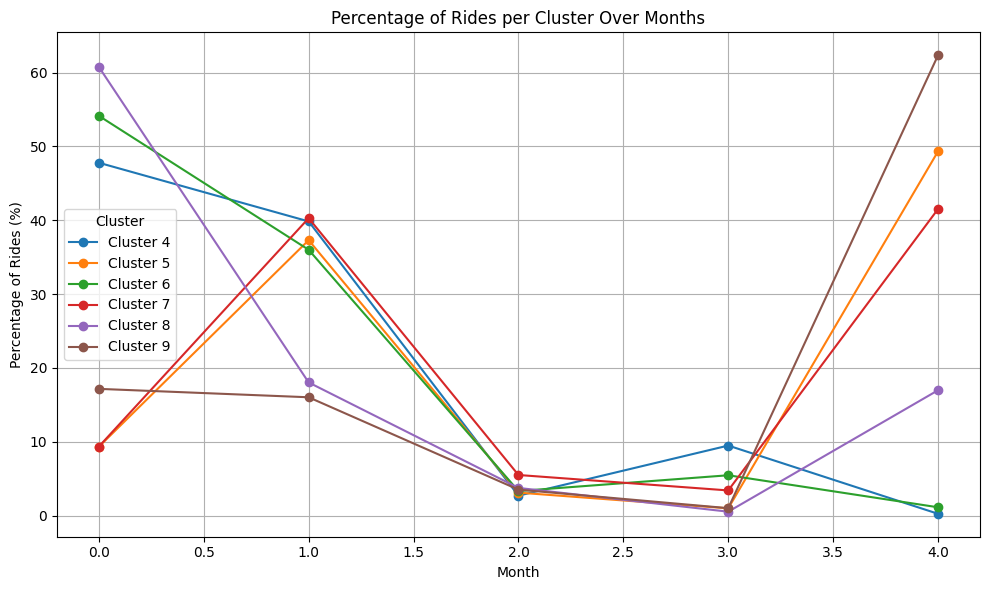

In [48]:
plt.figure(figsize=(10,6))

for cluster in cluster_percentages.columns:
    plt.plot(cluster_percentages.index, cluster_percentages[cluster], marker='o', label=f'Cluster {int(cluster)}')

plt.title('Percentage of Rides per Cluster Over Months')
plt.xlabel('Month')
plt.ylabel('Percentage of Rides (%)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

There are clear temporal patterns in how cluster dominance shifts month by month:

- Clusters 4, 5, and 6 dominate in the earlier months (April–May) with very high percentages (over 40% in some cases), but then drop sharply afterward.

- Clusters 7, 8, and 9, which had minimal activity early on, rise in prominence later in the period, with spikes around June–August.

- Some clusters, like Cluster 8, show a sudden jump in one month (e.g., June), then fall again—suggesting temporary activity hotspots.

These dynamic shifts in cluster dominance over time could be influenced by:

- **Seasonal variation**: More travel and tourism in summer months (June–August) may shift demand to different areas, leading to new pickup hotspots.

- **Event-driven surges**: Spikes in certain clusters for a single month might correspond to local events, festivals, or large gatherings.

- **Operational changes**: Uber may have shifted supply, opened new zones, or changed base operations that influenced ride patterns.

- **Weather or transit availability**: Factors like rain, heat waves, or subway outages could also redirect ride demand.

In [49]:
# Run linear regression within each cluster for June
selected_month = 6

monthly_data = uber_2014_pickup_data[uber_2014_pickup_data['Month'] == selected_month].copy()

monthly_data['Cluster'] = monthly_data['Cluster_Month_6']

monthly_data['Cluster']

,Cluster
2046226,1.0
2046227,1.0
2046228,4.0
2046229,0.0
2046230,4.0
...,...
2710065,1.0
2710066,0.0
2710067,0.0
2710068,1.0


In [50]:
cluster_daily_trips = monthly_data.groupby(['Cluster', 'Date', 'DayOfWeek'])['Base'].size().reset_index(name='TripCount')
cluster_daily_trips

,Cluster,Date,DayOfWeek,TripCount
0,0.0,2014-06-01,Sunday,6849
1,0.0,2014-06-02,Monday,9734
2,0.0,2014-06-03,Tuesday,13645
3,0.0,2014-06-04,Wednesday,13463
4,0.0,2014-06-05,Thursday,16804
...,...,...,...,...
145,4.0,2014-06-26,Thursday,299
146,4.0,2014-06-27,Friday,254
147,4.0,2014-06-28,Saturday,212
148,4.0,2014-06-29,Sunday,223


In [51]:
# Convert categorical variables to dummy variables
day_dummies = pd.get_dummies(cluster_daily_trips['DayOfWeek'], drop_first= True)

# Concat dummies to the dataset
cluster_daily_trips = pd.concat([cluster_daily_trips, day_dummies], axis = 1)

cluster_daily_trips

,Cluster,Date,DayOfWeek,TripCount,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.0,2014-06-01,Sunday,6849,False,False,True,False,False,False
1,0.0,2014-06-02,Monday,9734,True,False,False,False,False,False
2,0.0,2014-06-03,Tuesday,13645,False,False,False,False,True,False
3,0.0,2014-06-04,Wednesday,13463,False,False,False,False,False,True
4,0.0,2014-06-05,Thursday,16804,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
145,4.0,2014-06-26,Thursday,299,False,False,False,True,False,False
146,4.0,2014-06-27,Friday,254,False,False,False,False,False,False
147,4.0,2014-06-28,Saturday,212,False,True,False,False,False,False
148,4.0,2014-06-29,Sunday,223,False,False,True,False,False,False


In [52]:
# Combine day and month columns into a single list
dummies_columns_list = day_dummies.columns.tolist()

# Convert boolean variables to binary variables
cluster_daily_trips[dummies_columns_list] = cluster_daily_trips[dummies_columns_list].astype(int)

cluster_daily_trips

,Cluster,Date,DayOfWeek,TripCount,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.0,2014-06-01,Sunday,6849,0,0,1,0,0,0
1,0.0,2014-06-02,Monday,9734,1,0,0,0,0,0
2,0.0,2014-06-03,Tuesday,13645,0,0,0,0,1,0
3,0.0,2014-06-04,Wednesday,13463,0,0,0,0,0,1
4,0.0,2014-06-05,Thursday,16804,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
145,4.0,2014-06-26,Thursday,299,0,0,0,1,0,0
146,4.0,2014-06-27,Friday,254,0,0,0,0,0,0
147,4.0,2014-06-28,Saturday,212,0,1,0,0,0,0
148,4.0,2014-06-29,Sunday,223,0,0,1,0,0,0


In [53]:
import statsmodels.api as sm

regression_results = []

# Loop over each cluster
for cluster_label in cluster_daily_trips['Cluster'].unique():

    # Extract the number of daily trips for that cluster
    cluster_data = cluster_daily_trips[cluster_daily_trips['Cluster'] == cluster_label]

    # Define variables
    y = cluster_data['TripCount']
    X = cluster_data[day_dummies.columns]
    X = sm.add_constant(X)

    # Fit the model
    model = sm.OLS(y, X).fit()

    print(f"\nRegression Results for Cluster {cluster_label} in Month {selected_month}:")
    print(model.summary())

    regression_results.append({'Cluster': cluster_label, 'Model': model})


Regression Results for Cluster 0.0 in Month 6:
                            OLS Regression Results                            
Dep. Variable:              TripCount   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     35.80
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.51e-10
Time:                        05:36:14   Log-Likelihood:                -252.30
No. Observations:                  30   AIC:                             518.6
Df Residuals:                      23   BIC:                             528.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

In [54]:
# Run regression analyses within each cluster for each month
months = [4, 5, 6, 7, 8, 9]

monthly_regression_results = {}

for month in months:
    print(f"\nProcessing Month: {month}")
    monthly_data = uber_2014_pickup_data[uber_2014_pickup_data['Month'] == month].copy()

    coords = monthly_data[['Lat', 'Lon']]

    scaler = StandardScaler()
    norm_coords = scaler.fit_transform(coords)

    K_means = KMeans(n_clusters=5, random_state=42)
    K_means.fit(norm_coords)

    monthly_data['Cluster'] = K_means.labels_

    monthly_data['Date'] = monthly_data['Date/Time'].dt.date
    monthly_data['DayOfWeek'] = monthly_data['Date/Time'].dt.day_name()

    cluster_daily_trips = monthly_data.groupby(['Cluster', 'Date', 'DayOfWeek'])['Base'].size().reset_index(name='TripCount')

    day_dummies = pd.get_dummies(cluster_daily_trips['DayOfWeek'], drop_first=True)
    cluster_daily_trips = pd.concat([cluster_daily_trips, day_dummies], axis=1)

    dummies_columns_list = day_dummies.columns.tolist()

    cluster_daily_trips[dummies_columns_list] = cluster_daily_trips[dummies_columns_list].astype(int) # now ready for regression ### might wanna add a note about it the description

    month_results = []

    for cluster_label in cluster_daily_trips['Cluster'].unique():
        cluster_data = cluster_daily_trips[cluster_daily_trips['Cluster'] == cluster_label]

        y = cluster_data['TripCount']
        X = cluster_data[day_dummies.columns]
        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit()

        print(f"\nRegression Results for Month {month}, Cluster {cluster_label}:")
        print(model.summary())

        month_results.append({'Cluster': cluster_label, 'Model': model})

    monthly_regression_results[month] = month_results


Processing Month: 4

Regression Results for Month 4, Cluster 0:
                            OLS Regression Results                            
Dep. Variable:              TripCount   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     2.891
Date:                Fri, 11 Apr 2025   Prob (F-statistic):             0.0300
Time:                        05:36:15   Log-Likelihood:                -270.70
No. Observations:                  30   AIC:                             555.4
Df Residuals:                      23   BIC:                             565.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

The regression results reveal that the **influence of weekdays on trip volume varies significantly across clusters**, suggesting diverse localized rider behaviors.

For example, **Monday consistently shows a significant negative effect** in many clusters, indicating reduced demand at the start of the week in several areas.

In contrast, **weekend patterns differ more dramatically**: some clusters experience drops in ridership on Sundays, while others show positive or nonsignificant effects—pointing to variation between residential, commuter, and leisure-heavy zones.

These results highlight how **temporal demand patterns are not uniform city-wide**, but rather **cluster-specific**, reflecting the unique rhythm of activity in different parts of the city.